In [2]:
import pandas as pd


## Loading Data

In [3]:
# read data as pandas dataframe

df = pd.read_csv('./data/flavors.csv')

In [4]:
df

,celery,vegetable
0,corn,vegetable
1,cucumber,vegetable
2,horseradish,vegetable
3,vegetable,vegetable
4,potato,vegetable
...,...,...
850,wild,NaN
851,wine-lee,NaN
852,winey,NaN
853,yeasty,NaN


In [5]:
# confirm type of df

type(df)

pandas.core.frame.DataFrame

In [6]:
# first five rows of df

df.head()

,celery,vegetable
0,corn,vegetable
1,cucumber,vegetable
2,horseradish,vegetable
3,vegetable,vegetable
4,potato,vegetable


In [7]:
# first ten rows of df

df.head(10)

,celery,vegetable
0,corn,vegetable
1,cucumber,vegetable
2,horseradish,vegetable
3,vegetable,vegetable
4,potato,vegetable
5,tomato,vegetable
6,caraway,herbaceous
7,clove,herbaceous
8,fennel,herbaceous
9,herbaceous,herbaceous


In [8]:
# last five rows of df

df.tail()

,celery,vegetable
850,wild,NaN
851,wine-lee,NaN
852,winey,NaN
853,yeasty,NaN
854,ylang,NaN


In [9]:
# show dataframe info (notice there is not a column header -- maybe we should add some)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   celery     855 non-null    object
 1   vegetable  112 non-null    object
dtypes: object(2)
memory usage: 13.5+ KB


## Selecting Rows and Columns

In [10]:
# check columns

df.columns

Index(['celery', 'vegetable'], dtype='object')

In [11]:
df.columns = ["food", "class"]
df.columns

Index(['food', 'class'], dtype='object')

In [12]:
df.head()

,food,class
0,corn,vegetable
1,cucumber,vegetable
2,horseradish,vegetable
3,vegetable,vegetable
4,potato,vegetable


In [13]:
# to return data in specific column

df["food"]

0             corn
1         cucumber
2      horseradish
3        vegetable
4           potato
          ...     
850           wild
851       wine-lee
852          winey
853         yeasty
854          ylang
Name: food, Length: 855, dtype: object

In [14]:
# return multiple specific columns

df[["food","class"]]

,food,class
0,corn,vegetable
1,cucumber,vegetable
2,horseradish,vegetable
3,vegetable,vegetable
4,potato,vegetable
...,...,...
850,wild,NaN
851,wine-lee,NaN
852,winey,NaN
853,yeasty,NaN


In [15]:
# check data type of column (notice they are a series)

type(df["class"])

pandas.core.series.Series

In [16]:
# check data type of multiple columns

type(df[["food","class"]])

pandas.core.frame.DataFrame

One dimension of pandas is a series while two dimensions are a df

In [17]:
# select specific row of df

df.iloc[22]

food     gardenia
class      floral
Name: 22, dtype: object

In [18]:
# return all data where food is vegetable

df[df["class"] == "vegetable"]

,food,class
0,corn,vegetable
1,cucumber,vegetable
2,horseradish,vegetable
3,vegetable,vegetable
4,potato,vegetable
5,tomato,vegetable
131,cabbage,vegetable


In [19]:
import numpy as np
A = np.arange(10)
A

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
A[A % 2 == 0]

array([0, 2, 4, 6, 8])

In [21]:
type(A % 2 == 0)

numpy.ndarray

In [22]:
# convert df to np array 

df.values

array([['corn', 'vegetable'],
       ['cucumber', 'vegetable'],
       ['horseradish', 'vegetable'],
       ...,
       ['winey', nan],
       ['yeasty', nan],
       ['ylang', nan]], dtype=object)

In [23]:
# to return array of numbers (helpful in ml) --  does not work with our dataset because it has no numbers

A = df[["food","class"]].values
A

array([['corn', 'vegetable'],
       ['cucumber', 'vegetable'],
       ['horseradish', 'vegetable'],
       ...,
       ['winey', nan],
       ['yeasty', nan],
       ['ylang', nan]], dtype=object)

In [24]:
type(A)

numpy.ndarray

In [25]:
# create new csv from existing data

smalldf = df[["food","class"]]
smalldf.to_csv("output.csv")

In [26]:
!head output.csv

,food,class
0,corn,vegetable
1,cucumber,vegetable
2,horseradish,vegetable
3,vegetable,vegetable
4,potato,vegetable
5,tomato,vegetable
6,caraway,herbaceous
7,clove,herbaceous
8,fennel,herbaceous


In [27]:
# remove useless index on side

smalldf.to_csv("output.csv", index=False)

In [28]:
!head output.csv

food,class
corn,vegetable
cucumber,vegetable
horseradish,vegetable
vegetable,vegetable
potato,vegetable
tomato,vegetable
caraway,herbaceous
clove,herbaceous
fennel,herbaceous


## The apply() Function

In [29]:
def date_to_year(row):
  return int(row["Date_Joined"].split("-")[0])

date = "2013-02-18"

test_data = [["klay",date],["joe",date],["jillian", date]]

In [30]:
df = pd.DataFrame(test_data, columns=["Name", "Date_Joined"])

In [31]:
df

,Name,Date_Joined
0,klay,2013-02-18
1,joe,2013-02-18
2,jillian,2013-02-18


In [32]:
# loop over values in "Date_Joined" column and apply "date_to_year" function to said values

df.apply(date_to_year, axis=1)

0    2013
1    2013
2    2013
dtype: int64

In [33]:
# to create new column with said values

df["year"] = df.apply(date_to_year, axis=1)
df.head()

,Name,Date_Joined,year
0,klay,2013-02-18,2013
1,joe,2013-02-18,2013
2,jillian,2013-02-18,2013


## Plotting With Pandas

In [34]:
# read data as pandas dataframe

df = pd.read_csv('./data/atlcrime.csv')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [35]:
# first five rows of dataframe

df.head()

,Unnamed: 0,crime,number,date,location,beat,neighborhood,npu,lat,long
0,0,LARCENY-NON VEHICLE,103040029,10/31/2010,610 SPRING ST NW,509,Downtown,M,33.77101,-84.38895
1,1,AUTO THEFT,103040061,10/31/2010,850 OAK ST SW,401,West End,T,33.74057,-84.41680
2,2,LARCENY-FROM VEHICLE,103040169,10/31/2010,1344 METROPOLITAN PKWY SW,301,Capitol View Manor,X,33.71803,-84.40774
3,3,AUTO THEFT,103040174,10/31/2010,1752 PRYOR RD SW,307,Betmar LaVilla,Y,33.70731,-84.39674
4,4,LARCENY-NON VEHICLE,103040301,10/31/2010,JOHN WESLEY DOBBS AVE NE / CORLEY ST NE,604,Old Fourth Ward,M,33.75947,-84.36626


<AxesSubplot:>

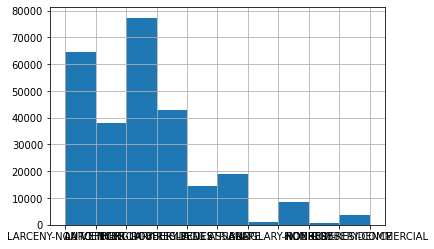

In [36]:
# histogram on crime

df["crime"].hist()

array([[<AxesSubplot:xlabel='Unnamed: 0', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='number', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='lat', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='long', ylabel='Unnamed: 0'>],
       [<AxesSubplot:xlabel='Unnamed: 0', ylabel='number'>,
        <AxesSubplot:xlabel='number', ylabel='number'>,
        <AxesSubplot:xlabel='lat', ylabel='number'>,
        <AxesSubplot:xlabel='long', ylabel='number'>],
       [<AxesSubplot:xlabel='Unnamed: 0', ylabel='lat'>,
        <AxesSubplot:xlabel='number', ylabel='lat'>,
        <AxesSubplot:xlabel='lat', ylabel='lat'>,
        <AxesSubplot:xlabel='long', ylabel='lat'>],
       [<AxesSubplot:xlabel='Unnamed: 0', ylabel='long'>,
        <AxesSubplot:xlabel='number', ylabel='long'>,
        <AxesSubplot:xlabel='lat', ylabel='long'>,
        <AxesSubplot:xlabel='long', ylabel='long'>]], dtype=object)

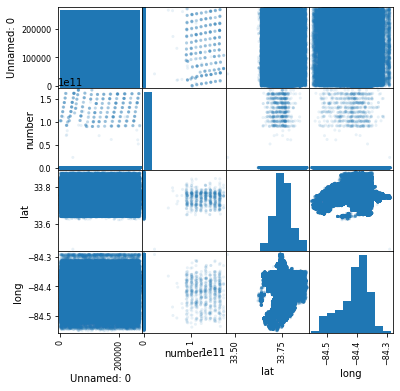

In [37]:
# scatter matrix (alpha refers to amount of transparency, figsize refers to width and height of output)

from pandas.plotting import scatter_matrix
scatter_matrix(df,alpha=.1,figsize=(6,6))

## Generate, plot and save the "Donut Dataset" with quadratic features
1. create df with just (x1,x2,y)
2. add x1^2,x2^2, and x1 * x2
3. save csv without header row, index row

In [38]:
x1s = [np.random.randint(-10,11) for i in range(200)]
x2s = [np.random.randint(-10,11) for i in range(200)]
ys = [np.random.randint(-10,11) for i in range(200)]

In [39]:
test_data = []
for i in x1s:
  index = x1s.index(i)
  test_data.append([x1s[index], x2s[index], ys[index]])
test_data

[[-1, 7, -9],
 [0, -6, 6],
 [-7, 4, -3],
 [-1, 7, -9],
 [-2, -5, 1],
 [5, -2, 3],
 [-6, -8, -2],
 [7, 6, 7],
 [-6, -8, -2],
 [1, -8, -8],
 [5, -2, 3],
 [5, -2, 3],
 [10, -3, 9],
 [3, -4, -3],
 [-5, 3, -8],
 [-10, -5, -8],
 [-4, 7, 3],
 [-2, -5, 1],
 [6, -5, -6],
 [-7, 4, -3],
 [-1, 7, -9],
 [-4, 7, 3],
 [-9, -2, 2],
 [2, 6, -2],
 [2, 6, -2],
 [-7, 4, -3],
 [-9, -2, 2],
 [-1, 7, -9],
 [-9, -2, 2],
 [-5, 3, -8],
 [5, -2, 3],
 [0, -6, 6],
 [-2, -5, 1],
 [-9, -2, 2],
 [4, -10, -8],
 [-2, -5, 1],
 [-9, -2, 2],
 [-8, 1, -4],
 [-1, 7, -9],
 [-4, 7, 3],
 [9, -10, -1],
 [10, -3, 9],
 [-6, -8, -2],
 [-4, 7, 3],
 [10, -3, 9],
 [-5, 3, -8],
 [5, -2, 3],
 [3, -4, -3],
 [-4, 7, 3],
 [5, -2, 3],
 [9, -10, -1],
 [-1, 7, -9],
 [2, 6, -2],
 [7, 6, 7],
 [-3, 9, -10],
 [5, -2, 3],
 [6, -5, -6],
 [-6, -8, -2],
 [9, -10, -1],
 [8, 0, -10],
 [10, -3, 9],
 [-6, -8, -2],
 [-9, -2, 2],
 [-4, 7, 3],
 [5, -2, 3],
 [1, -8, -8],
 [-8, 1, -4],
 [-1, 7, -9],
 [0, -6, 6],
 [2, 6, -2],
 [-9, -2, 2],
 [-7, 4, -3],
 [-9,

In [40]:
# create dataframe

df = pd.DataFrame(test_data, columns=["x1","x2","y"])

In [41]:
def squared(n):
  return n*n

In [42]:
# add column based on prior information

df = df.assign(x1sq=lambda x:x.x1*x.x1)
df = df.assign(x2sq=lambda x:x.x2*x.x2)


In [43]:
df = df.assign(x1x2=lambda x:x.x1*x.x2)

In [44]:
df

,x1,x2,y,x1sq,x2sq,x1x2
0,-1,7,-9,1,49,-7
1,0,-6,6,0,36,0
2,-7,4,-3,49,16,-28
3,-1,7,-9,1,49,-7
4,-2,-5,1,4,25,10
...,...,...,...,...,...,...
195,2,6,-2,4,36,12
196,6,-5,-6,36,25,-30
197,0,-6,6,0,36,0
198,2,6,-2,4,36,12


In [46]:
df.to_csv("donut.csv", header=False, index=None)